<h1 style="font-size:300%;">Import librairies and modules</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import timedelta
from datetime import date
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


<h1 style="font-size:300%;">Loading the CSV file</h1>

In [3]:
df = pd.read_csv("Walmart_Store_Sales.CSV")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


<h1 style="font-size:300%;">Dataset exploration and description</h1>

In [4]:
# Let see the basic description of the dataset in terms of non null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

<p style="font-size:100%;"><strong> From the cell above we can see that there is no null value in the dataset
</strong></p>

In [6]:
# Date has object as type: Let convert the type into datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True) # Need to tell pandas that our date start by day.
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
# Let's check if Date has changed type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


<p style="font-size:100%;"><strong> The data type of Date was successfully changed from object to datetime
</strong></p>

In [8]:
# Let get the statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
#Now let check for corelation between the features
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<AxesSubplot:>

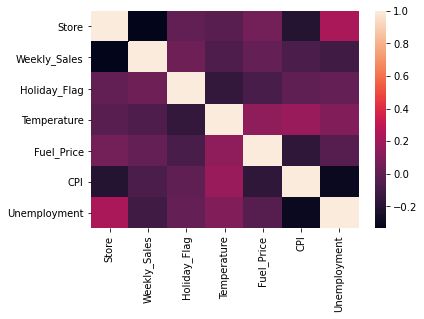

In [10]:
#Let visualize the correlation table with the heatap method in Seaborn
sns.heatmap(df.corr())

<p style="font-size:100%;"><strong> The above table and the heatmap are showing that holiday flag is the highest correlated feature to weekly sales. This table will be useful in choosing features in the modeling process.
</strong></p>

<h1 style="background-color:powderblue;font-size:300%;">Analyses Tasks</h1>

<p style="font-size:120%;"><strong>1.	Which store has the highest sales? Lowest?
</strong></p>

In [11]:
# Let group the stores and add up their sales
df.groupby("Store").sum().sort_values("Weekly_Sales",ascending = False)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,3.013978e+08,10,7929.55,488.718,29892.452680,1054.112
4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951
14,2.889999e+08,10,8264.11,488.718,26638.851959,1236.771
13,2.865177e+08,10,7678.69,469.919,18401.192733,1001.261
2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210
10,2.716177e+08,10,10330.49,511.357,18401.192733,1195.904
27,2.538559e+08,10,8195.49,511.696,19878.613542,1144.250
6,2.237561e+08,10,9967.10,460.417,31110.107182,944.787
1,2.224028e+08,10,9767.87,460.417,30887.555523,1088.290


<p style="font-size:100%;"><strong> The table above is showing the total sale of each store. Store 20 has the highest sale in total and store 33 has the lowest sale in total.
</strong></p>

In [12]:
#Let show the maximum weekly sale of each store
df.groupby("Store").max().sort_values("Weekly_Sales",ascending = False)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
14,2012-10-26,3818686.45,1,82.99,4.066,192.330854,8.992
20,2012-10-26,3766687.43,1,79.20,4.066,216.151590,8.187
10,2012-10-26,3749057.69,1,95.36,4.468,131.193097,9.765
4,2012-10-26,3676388.98,1,86.09,3.881,131.193097,8.623
13,2012-10-26,3595903.20,1,83.68,3.845,131.193097,8.316
2,2012-10-26,3436007.68,1,93.34,3.907,223.078337,8.324
27,2012-10-26,3078162.08,1,82.69,4.211,142.937617,8.253
23,2012-10-26,2734277.10,1,77.16,4.101,138.911700,5.892
6,2012-10-26,2727575.18,1,91.46,3.907,225.068625,7.259


In [13]:
# Let show the minimum wekkly sale of each store
df.groupby("Store").min().sort_values("Weekly_Sales",ascending = False)

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
4,2010-02-05,1762539.30,0,28.84,2.540,126.064000,3.879
20,2010-02-05,1761016.51,0,20.39,2.699,203.610178,6.961
2,2010-02-05,1650394.44,0,33.02,2.514,209.998458,6.170
13,2010-02-05,1633663.12,0,16.94,2.654,126.064000,5.621
10,2010-02-05,1627707.31,0,42.58,2.825,126.064000,6.943
14,2010-02-05,1479514.66,0,24.05,2.699,181.646815,8.424
1,2010-02-05,1316899.31,0,35.40,2.514,210.337426,6.573
27,2010-02-05,1263534.86,0,23.64,2.837,135.352461,7.725
6,2010-02-05,1261253.18,0,38.37,2.514,211.842177,5.329


<p style="font-size:120%;"><strong>2.	Which store has the highest deviation in sales? Lowest?
</strong></p>

In [14]:
# Let group the stores and show the standard deviation in sales of each store
df.groupby("Store").std().sort_values("Weekly_Sales",ascending = False)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
14,317569.949476,0.255926,16.271612,0.443029,3.594820,0.151460
10,302262.062504,0.255926,14.031578,0.446957,1.858300,0.843684
20,275900.562742,0.255926,16.543846,0.443029,4.176736,0.305069
4,266201.442297,0.255926,16.180023,0.416967,1.858300,1.421267
13,265506.995776,0.255926,17.591004,0.392727,1.858300,0.881501
23,249788.038068,0.255926,17.589429,0.455203,2.378864,0.545289
27,239930.135688,0.255926,16.020286,0.454128,2.439042,0.164679
2,237683.694682,0.255926,15.492766,0.427313,4.342286,0.615414
39,217466.454833,0.255926,12.395371,0.427313,4.315290,0.702688


<p style="font-size:100%;"><strong> The table above is showing the standard deviations of each store. Store 14 has the highest standard deviation and store 37 has the lowest standard deviation.
</strong></p>

<p style="font-size:120%;"><strong>3.	Is there any linear relationship between sales and temperature? 
</strong></p>

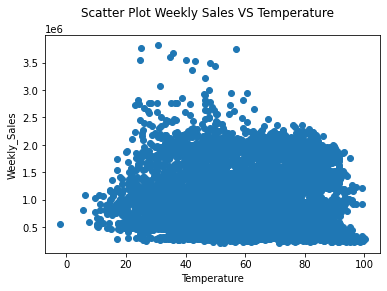

In [15]:
# Let plot the scatter plot the weekly sales in respect of temperature
plt.scatter('Temperature', 'Weekly_Sales', data = df)
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.suptitle('Scatter Plot Weekly Sales VS Temperature')
plt.show()

<p style="font-size:100%;"><strong> Looking at the scatter plot above, I think we can get a linear relationship between sales and temperature but it will not be accurate.
</strong></p>

<p style="font-size:120%;"><strong>4.	How does a holiday week affect sales?
</strong></p>

In [16]:
#Let extract the sub dataset containing only holidays.
df10 = df[df['Holiday_Flag'] == 1]
df10

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424


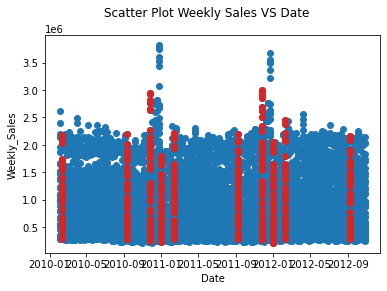

In [17]:
#Let plot the weekly sales of the whole dataset and the weekly sales of the holidays dataset in different colors
plt.scatter('Date', 'Weekly_Sales', data = df)
plt.scatter('Date', 'Weekly_Sales', data = df10, color = 'C3')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.suptitle('Scatter Plot Weekly Sales VS Date')
plt.show()

<p style="font-size:100%;"><strong> Looking at the holidays sales in red compared to all the sales, we can conclude that holiday weeks affect the sales, because thehighest sales are around the holiday wweks.
</strong></p>

<p style="font-size:120%;"><strong>5.	Can you test for multi-collinearity (Temperature, Fuel_Price, CPI, Unemployment)
</strong></p>

In [18]:
# we will use the variance inflation factor (VIF) score to test the multi collinearity of Temperature, Fuel_Price, CPI, Unemployment
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature        VIF
0   Temperature  13.057751
1    Fuel_Price  25.632716
2           CPI  14.573468
3  Unemployment  14.839440


<p style="font-size:100%;"><strong> We can say that the multicollinearity of Temperature, Fuel_Price, CPI and Unemployment employment is very important because the score are greater than 5.
</strong></p>

<p style="font-size:120%;"><strong>6.	Can you test the normality of Weekly_Sales for store 3? 
</strong></p>

Text(0.5, 0.98, 'Histogram of the Weekly Sales')

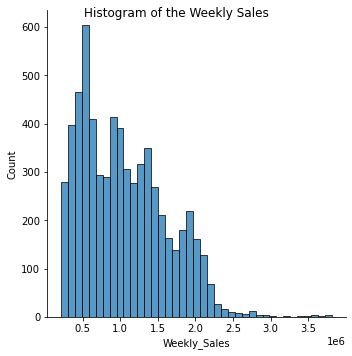

In [19]:
#Let plot the histogram of the weekly sales
sns.displot(df, x="Weekly_Sales")
plt.suptitle('Histogram of the Weekly Sales')

<p style="font-size:100%;"><strong> We can say that there is no normality or normal distriution in weekly sales because the histogram of weekly sales above does not display the bell curve pattern.
</strong></p>

<h1 style="background-color:powderblue;font-size:300%;">Modeling Tasks</h1>

<p style="font-size:120%;"><strong>1.	Can you list how well the following are linearly correlated to Weekly_Sales:
Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment ?
</strong></p>

In [20]:
df1 = df.copy()
df1 = df1.set_index('Date').to_period('7D') # Adding frequency to the index so we can generate more weeks for prediction

df2 = df1.groupby('Date').mean()


In [21]:
df2.index


PeriodIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
             '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
             '2010-04-02', '2010-04-09',
             ...
             '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
             '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
             '2012-10-19', '2012-10-26'],
            dtype='period[7D]', name='Date', length=143, freq='7D')

<AxesSubplot:>

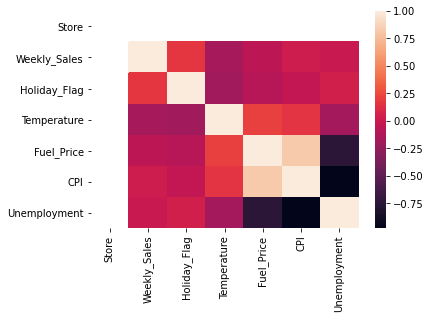

In [22]:
#Let check the coorelation between thwe features with the sales grouped by dates
sns.heatmap(df2.corr())

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

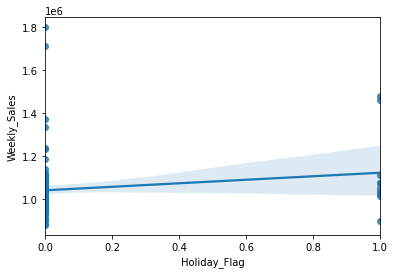

In [23]:
#Let get the regression plots of Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment respectively with weekly sales.
sns.regplot(x="Holiday_Flag", y="Weekly_Sales", data=df2)

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

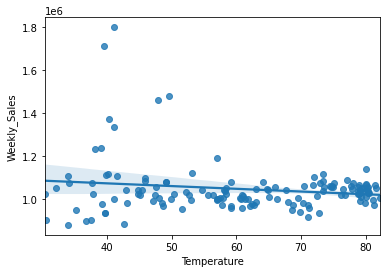

In [24]:
sns.regplot(x="Temperature", y="Weekly_Sales", data=df2)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

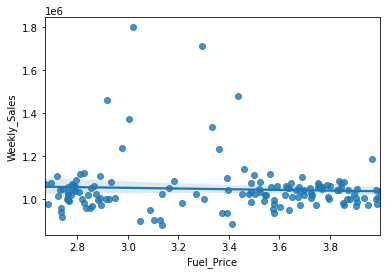

In [25]:
sns.regplot(x="Fuel_Price", y="Weekly_Sales", data=df2)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

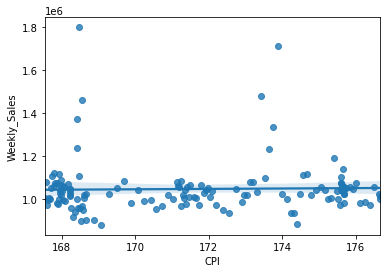

In [26]:
sns.regplot(x="CPI", y="Weekly_Sales", data=df2)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

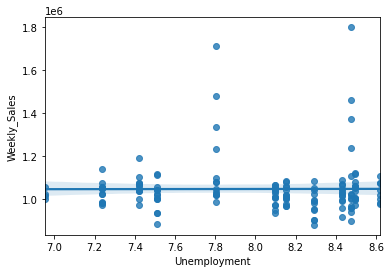

In [27]:
sns.regplot(x="Unemployment", y="Weekly_Sales", data=df2)

<p style="font-size:100%;"><strong> Looking at the regression fit plots above, I can say that Temperature, Fuel_Price, CPI are somehow linearly correlated to weekly sales. Let get the regression score of all the fits we plotted above.
</strong></p>

In [28]:
from numpy import array
X = df2[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X1 = df2.loc[:, ['Holiday_Flag']]
X2 = df2.loc[:, ['Temperature']]
X3 = df2.loc[:, ['Fuel_Price']]
X4 = df2.loc[:, ['CPI']]
X5 = df2.loc[:, ['Unemployment']]
y = df2['Weekly_Sales']
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import linear_model

In [29]:

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
Regression = linear_model.LinearRegression()
# Fit model
Regression.fit(train_X, train_y)

# get predicted prices on validation data
Predict = Regression.predict(val_X)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


In [30]:
train_X1, val_X1, train_y, val_y = train_test_split(X1, y, random_state = 0)
Regression = linear_model.LinearRegression()

Regression.fit(train_X1, train_y)

Predict1 = Regression.predict(val_X1)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


In [31]:
train_X2, val_X2, train_y, val_y = train_test_split(X2, y, random_state = 0)
Regression = linear_model.LinearRegression()

Regression.fit(train_X2, train_y)

Predict2 = Regression.predict(val_X2)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


In [32]:
train_X3, val_X3, train_y, val_y = train_test_split(X3, y, random_state = 0)
Regression = linear_model.LinearRegression()

Regression.fit(train_X3, train_y)

Predict3 = Regression.predict(val_X3)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


In [33]:
train_X4, val_X4, train_y, val_y = train_test_split(X4, y, random_state = 0)
Regression = linear_model.LinearRegression()

Regression.fit(train_X4, train_y)

Predict4 = Regression.predict(val_X4)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


In [34]:
train_X5, val_X5, train_y, val_y = train_test_split(X5, y, random_state = 0)
Regression = linear_model.LinearRegression()

Regression.fit(train_X5, train_y)

Predict1 = Regression.predict(val_X5)
print("MAE = ", mean_absolute_error(val_y, Predict))
print("MAPE = ", mean_absolute_percentage_error(val_y, Predict))
print("R2  = ", r2_score(val_y, Predict))

MAE =  79129.30331156516
MAPE =  0.06985029621877224
R2  =  -0.05447373839785663


<p style="font-size:100%;"><strong> The regression fits have all an average percent error of 7% wich I can say is not a very bad score for a predictive model, but the R2 score is very low and negative which does not look good. We want the R2 score to be close to 1 as possible. We will try to improve that by doing some feature engineering.
</strong></p>

<p style="font-size:120%;"><strong>2.	Can you create a forecast model without any features to forecast Weekly_Sales out 8 additional weeks using all historical data provided?
</strong></p>

In [35]:
# Forecast model with no features. Let use numpy to create time step for the dates in the dataset.
df4 = df2.copy()
df4['Time'] = np.arange(len(df4.index))
df4.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Time
Date,,,,,,,,
2010-02-05,23,1.105572e+06,0,34.037333,2.717844,167.730885,8.619311,0
2010-02-12,23,1.074148e+06,1,34.151333,2.694022,167.825608,8.619311,1
2010-02-19,23,1.072822e+06,0,37.719778,2.672067,167.871686,8.619311,2
2010-02-26,23,9.770794e+05,0,39.243556,2.683933,167.909657,8.619311,3
2010-03-05,23,1.041588e+06,0,42.917333,2.731200,167.947628,8.619311,4


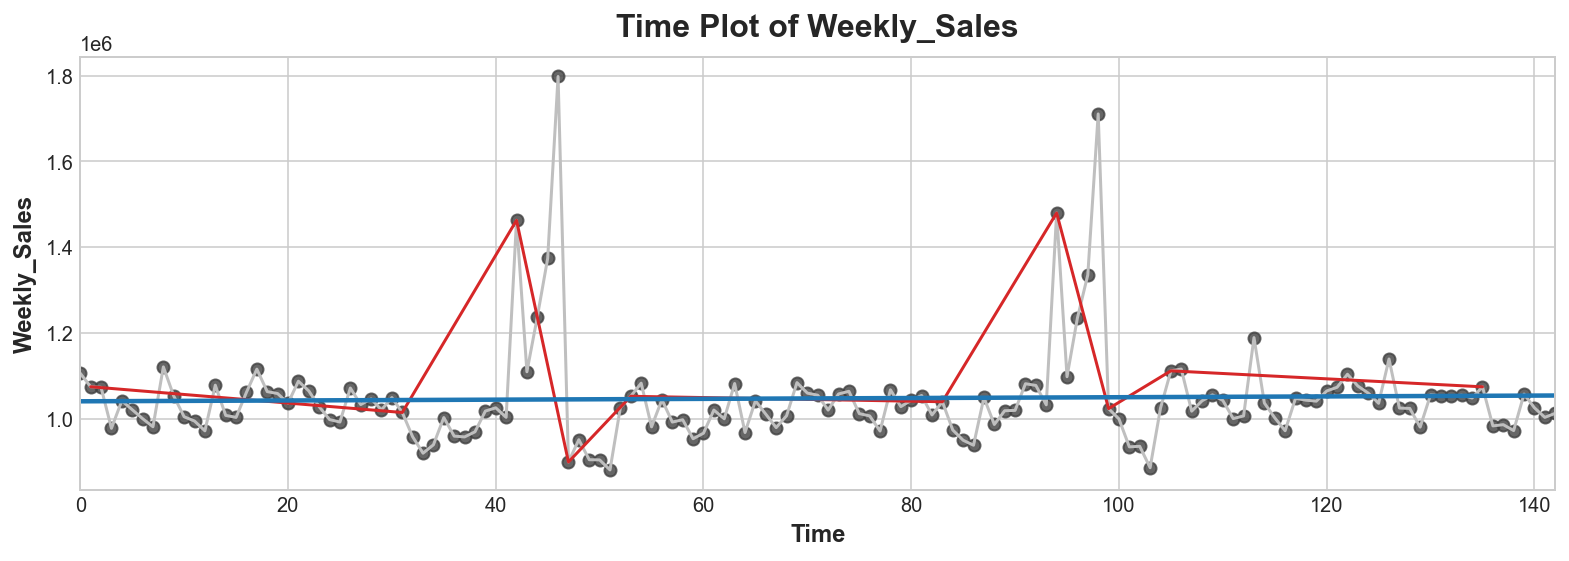

In [36]:
#Let visualize the regression fit of the time steps and the weekly sales and the impact of holidays on sales
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Weekly_Sales', data=df4, color='0.75')
ax.plot('Time', 'Weekly_Sales', data = df4[df4['Holiday_Flag']==1], color = 'C3') # Plotting holidays in red to highlight the impact of holididays
ax = sns.regplot(x='Time', y='Weekly_Sales', data=df4, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Weekly_Sales');

In [37]:
#Let train and score a linear regression model of weekly sales using the timestep created.

In [38]:
y = df4['Weekly_Sales']
X = df4.loc[:, ['Time']]

model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

print("MAE = ", mean_absolute_error(y, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y, y_pred))
print("R2  = ", r2_score(y, y_pred))

MAE =  64560.207057839405
MAPE =  0.05708029692420589
R2  =  0.001058152661284284


<p style="font-size:100%;"><strong> The regression model with time has an average percent eeror of 5.7% which is not a very good score for a predictive model. The R2 score improved alittle bit, but is still low.
</strong></p>

In [39]:
#Now let create 8 additional time steps or weeks and use the model to predict their sales
from statsmodels.tsa.deterministic import DeterministicProcess
dp = DeterministicProcess(
    index=df4.index,  # dates from the training data
    constant=False,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
X = dp.in_sample()

# Creating features for a 8-weeks forecast.
X_forecast = dp.out_of_sample(steps=8)


In [40]:

model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

print("MAE = ", mean_absolute_error(y, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y, y_pred))
print("R2  = ", r2_score(y, y_pred))

MAE =  64560.207057839405
MAPE =  0.057080296924205874
R2  =  0.001058152661284284


In [41]:
X_forecast

,trend
2012-11-02,144.0
2012-11-09,145.0
2012-11-16,146.0
2012-11-23,147.0
2012-11-30,148.0
2012-12-07,149.0
2012-12-14,150.0
2012-12-21,151.0


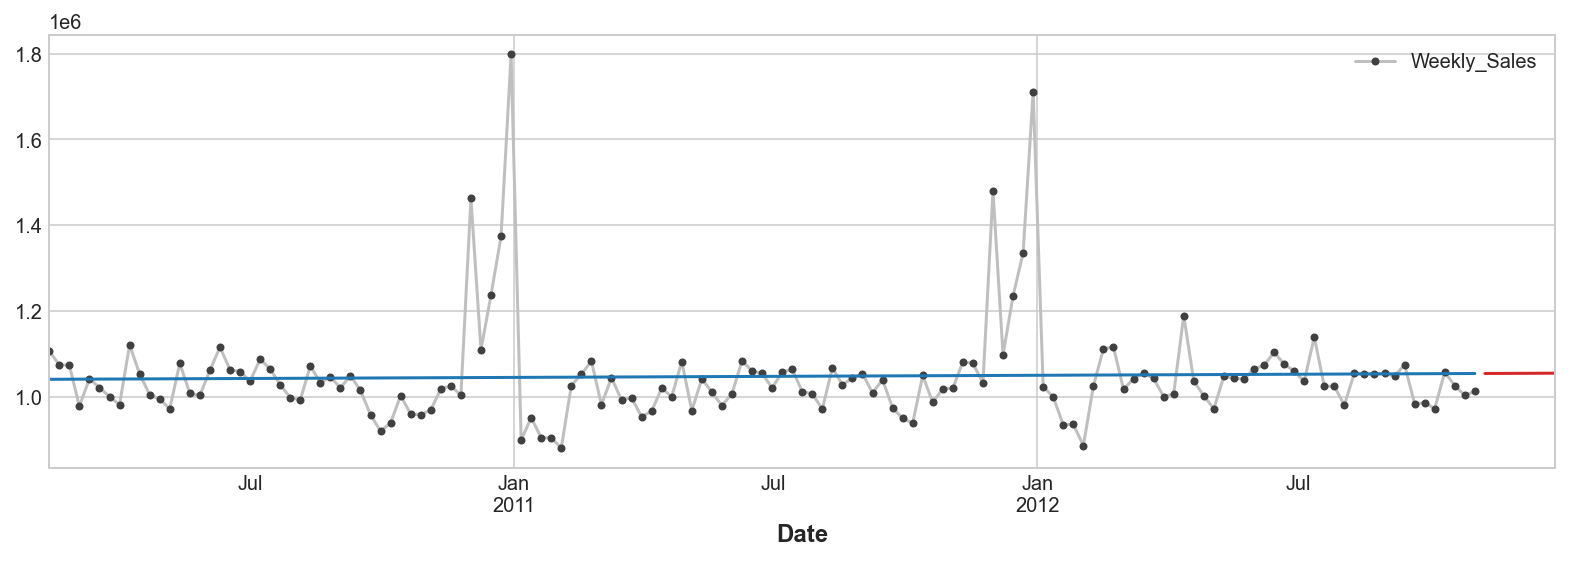

In [42]:
#Let plot the model and the 8 additional weeks 

y_forecast = pd.Series(model.predict(X_forecast), index = X_forecast.index)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'
ax = y.plot(**plot_params)
ax = y_pred.plot()
ax = y_forecast.plot(color = 'C3') # Plotting the forecasted sales in red.
                       

<p style="font-size:120%;"><strong>3.	Repeating the same process, can you create a forecast model with features?
</strong></p>

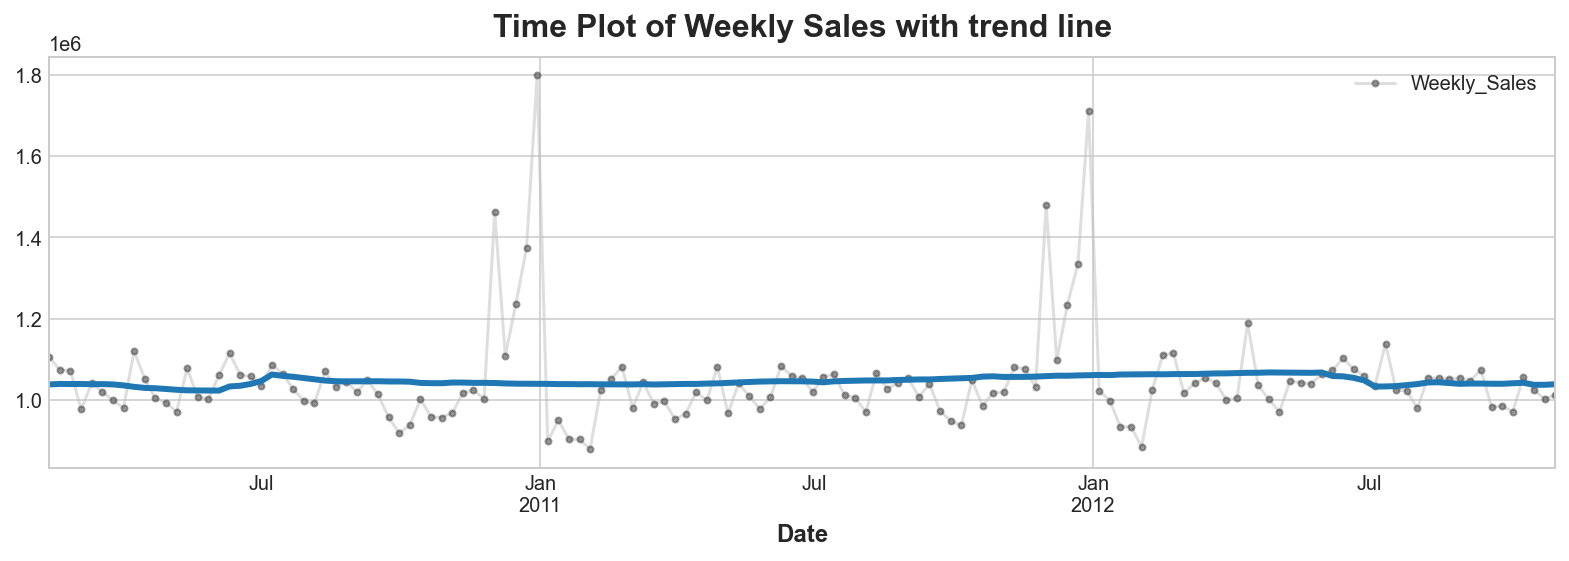

In [43]:
#Let get at trend from the timeserie data
trend = df4['Weekly_Sales'].rolling(
    window=52,
    center=True,
    min_periods=26,
).mean()

ax = df4['Weekly_Sales'].plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Weekly Sales with trend line');

<p style="font-size:100%;"><strong> The trend is linear.
</strong></p>

In [44]:
#Let create a lag featur
df5 = df4.copy()
df5['Lag_1'] = df5['Weekly_Sales'].shift(1)
df5 = df5.reindex(columns=['Weekly_Sales', 'Lag_1'] ).dropna()
df5.head()

,Weekly_Sales,Lag_1
Date,,
2010-02-12,1.074148e+06,1.105572e+06
2010-02-19,1.072822e+06,1.074148e+06
2010-02-26,9.770794e+05,1.072822e+06
2010-03-05,1.041588e+06,9.770794e+05
2010-03-12,1.020564e+06,1.041588e+06


In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 142 entries, 2010-02-12 to 2012-10-26
Freq: 7D
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  142 non-null    float64
 1   Lag_1         142 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


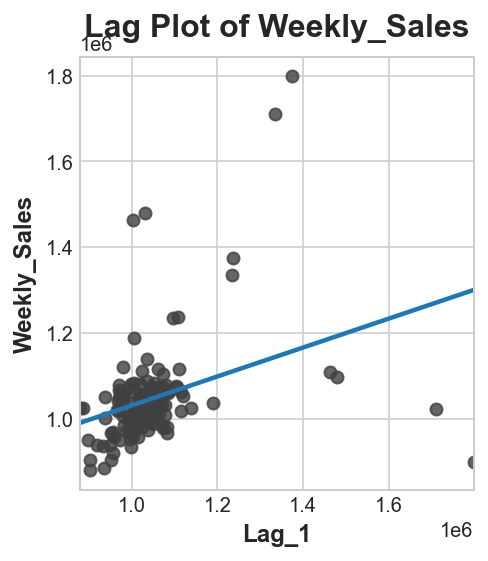

In [46]:
#Let visualize the linear relationship between the sales and the lag
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Weekly_Sales', data=df5, ci=None, scatter_kws=dict(color='0.25'))
#ax = sns.regplot(x='Lag_2', y='Weekly_Sales', data=df5, ci=None, scatter_kws=dict(color='0.25'))
#ax3 = sns.regplot(x='Lag_3', y='Weekly_Sales', data=df5, ci=None, scatter_kws=dict(color='0.25'))
#ax4 = sns.regplot(x='Lag_4', y='Weekly_Sales', data=df5, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Weekly_Sales');

In [47]:
# Let train a linear regression of the sales and lag 
X = df5.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df5.loc[:, 'Weekly_Sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = linear_model.LinearRegression()
model.fit(X, y)

df5.dropna(inplace=True)

y_pred = pd.Series(model.predict(X), index=X.index)

In [48]:
y

Date
2010-02-12    1.074148e+06
2010-02-19    1.072822e+06
2010-02-26    9.770794e+05
2010-03-05    1.041588e+06
2010-03-12    1.020564e+06
                  ...     
2012-09-28    9.718867e+05
2012-10-05    1.057036e+06
2012-10-12    1.025078e+06
2012-10-19    1.002720e+06
2012-10-26    1.012091e+06
Freq: 7D, Name: Weekly_Sales, Length: 142, dtype: float64

In [49]:
y_pred

Date
2010-02-12    1.066255e+06
2010-02-19    1.055647e+06
2010-02-26    1.055199e+06
2010-03-05    1.022875e+06
2010-03-12    1.044654e+06
                  ...     
2012-09-28    1.025771e+06
2012-10-05    1.021122e+06
2012-10-12    1.049869e+06
2012-10-19    1.039080e+06
2012-10-26    1.031532e+06
Freq: 7D, Length: 142, dtype: float64

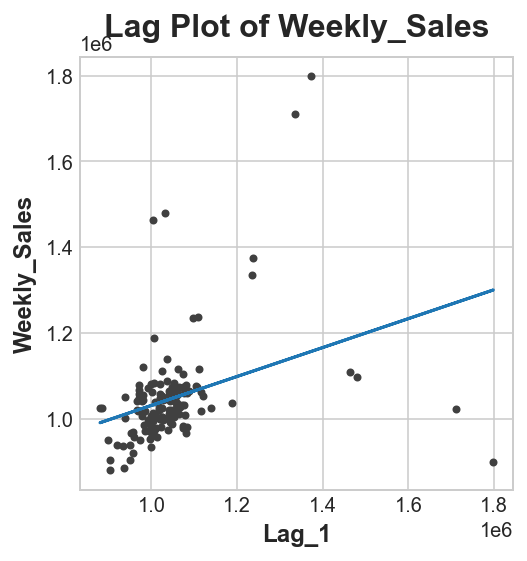

In [50]:
#Let visualize the model
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Weekly_Sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Weekly_Sales');

In [51]:
# Getting the score of the regression of sales wth the lag
print("MAE = ", mean_absolute_error(y, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y, y_pred))
print("R2  = ", r2_score(y, y_pred))

MAE =  61990.291135825835
MAPE =  0.055081257988092026
R2  =  0.1141006751620589


<p style="font-size:100%;"><strong> Thre is a litle bit of improvement in all the scores using the lag feature.
</strong></p>

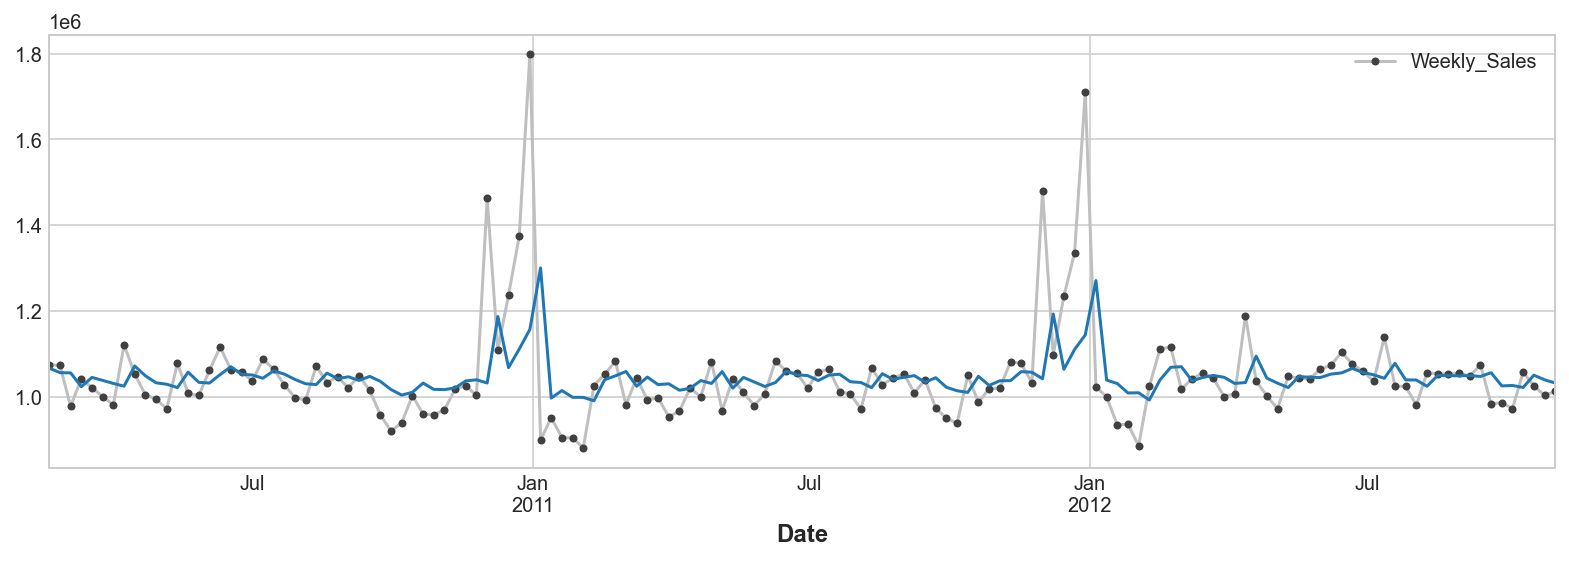

In [52]:
#Let visulize the model on the time plot
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'
ax = y.plot(**plot_params)
ax = y_pred.plot()

<p style="font-size:100%;"><strong> We can conclude that the lag feature did catch the impact of holidays on the sales. Next we will add the holidays features to the training set to see if we can improve our scores.
</strong></p>

In [53]:
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


In [54]:
#Let create a dataset with the holidays and their descriptions
holidays = {
    "Date":['2010-02-12','2011-02-11','2012-02-10','2013-02-08','2010-09-10','2011-09-09','2012-09-07','2013-09-06','2010-11-26','2011-11-25','2012-11-23','2013-11-29','2010-12-31','2011-12-30','2012-12-28','2013-12-27'],
    "Holiday":['Super Bowl','Super Bowl','Super Bowl','Super Bowl','Labor Day','Labor Day','Labor Day','Labor Day','Thanksgiving','Thanksgiving','Thanksgiving','Thanksgiving','Christmas','Christmas','Christmas','Christmas']
}

H = pd.DataFrame(holidays)
H

,Date,Holiday
0,2010-02-12,Super Bowl
1,2011-02-11,Super Bowl
2,2012-02-10,Super Bowl
3,2013-02-08,Super Bowl
4,2010-09-10,Labor Day
5,2011-09-09,Labor Day
6,2012-09-07,Labor Day
7,2013-09-06,Labor Day
8,2010-11-26,Thanksgiving
9,2011-11-25,Thanksgiving


In [55]:
#Let encode the holidays
H1 = pd.get_dummies(H['Holiday'])
H1

,Christmas,Labor Day,Super Bowl,Thanksgiving
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,0,0,1
9,0,0,0,1


In [56]:
H2 = H.join(H1)
H2

,Date,Holiday,Christmas,Labor Day,Super Bowl,Thanksgiving
0,2010-02-12,Super Bowl,0,0,1,0
1,2011-02-11,Super Bowl,0,0,1,0
2,2012-02-10,Super Bowl,0,0,1,0
3,2013-02-08,Super Bowl,0,0,1,0
4,2010-09-10,Labor Day,0,1,0,0
5,2011-09-09,Labor Day,0,1,0,0
6,2012-09-07,Labor Day,0,1,0,0
7,2013-09-06,Labor Day,0,1,0,0
8,2010-11-26,Thanksgiving,0,0,0,1
9,2011-11-25,Thanksgiving,0,0,0,1


In [57]:
H2 = H2.drop('Holiday', axis = 1)
H2['Date'] = pd.to_datetime(H2['Date'], dayfirst = True)
H2

,Date,Christmas,Labor Day,Super Bowl,Thanksgiving
0,2010-02-12,0,0,1,0
1,2011-02-11,0,0,1,0
2,2012-02-10,0,0,1,0
3,2013-02-08,0,0,1,0
4,2010-09-10,0,1,0,0
5,2011-09-09,0,1,0,0
6,2012-09-07,0,1,0,0
7,2013-09-06,0,1,0,0
8,2010-11-26,0,0,0,1
9,2011-11-25,0,0,0,1


In [58]:

H3 = H2.set_index('Date').to_period('7d')
H3


,Christmas,Labor Day,Super Bowl,Thanksgiving
Date,,,,
2010-02-12,0,0,1,0
2011-02-11,0,0,1,0
2012-02-10,0,0,1,0
2013-02-08,0,0,1,0
2010-09-10,0,1,0,0
2011-09-09,0,1,0,0
2012-09-07,0,1,0,0
2013-09-06,0,1,0,0
2010-11-26,0,0,0,1


In [59]:
H3.index

PeriodIndex(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08',
             '2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06',
             '2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29',
             '2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'],
            dtype='period[7D]', name='Date', freq='7D')

In [60]:
#Let join the encoded the holidays to the weekly sales and lag features
df6 = df5.join(H3, on = 'Date').fillna(0.0)
df6

,Weekly_Sales,Lag_1,Christmas,Labor Day,Super Bowl,Thanksgiving
Date,,,,,,
2010-02-12,1.074148e+06,1.105572e+06,0.0,0.0,1.0,0.0
2010-02-19,1.072822e+06,1.074148e+06,0.0,0.0,0.0,0.0
2010-02-26,9.770794e+05,1.072822e+06,0.0,0.0,0.0,0.0
2010-03-05,1.041588e+06,9.770794e+05,0.0,0.0,0.0,0.0
2010-03-12,1.020564e+06,1.041588e+06,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2012-09-28,9.718867e+05,9.856566e+05,0.0,0.0,0.0,0.0
2012-10-05,1.057036e+06,9.718867e+05,0.0,0.0,0.0,0.0
2012-10-12,1.025078e+06,1.057036e+06,0.0,0.0,0.0,0.0


In [61]:
#let traiin and score a regression model with lag feature and the holidays features
X = df6.drop('Weekly_Sales', axis = 1)
y = df6.loc[:, 'Weekly_Sales']  # create the target

model = linear_model.LinearRegression()
model.fit(X, y)

df5.dropna(inplace=True)

y_pred = pd.Series(model.predict(X), index=X.index)

In [62]:
print("MAE = ", mean_absolute_error(y, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y, y_pred))
print("R2  = ", r2_score(y, y_pred))

MAE =  52311.91828671842
MAPE =  0.047496469805816205
R2  =  0.5051003198306739


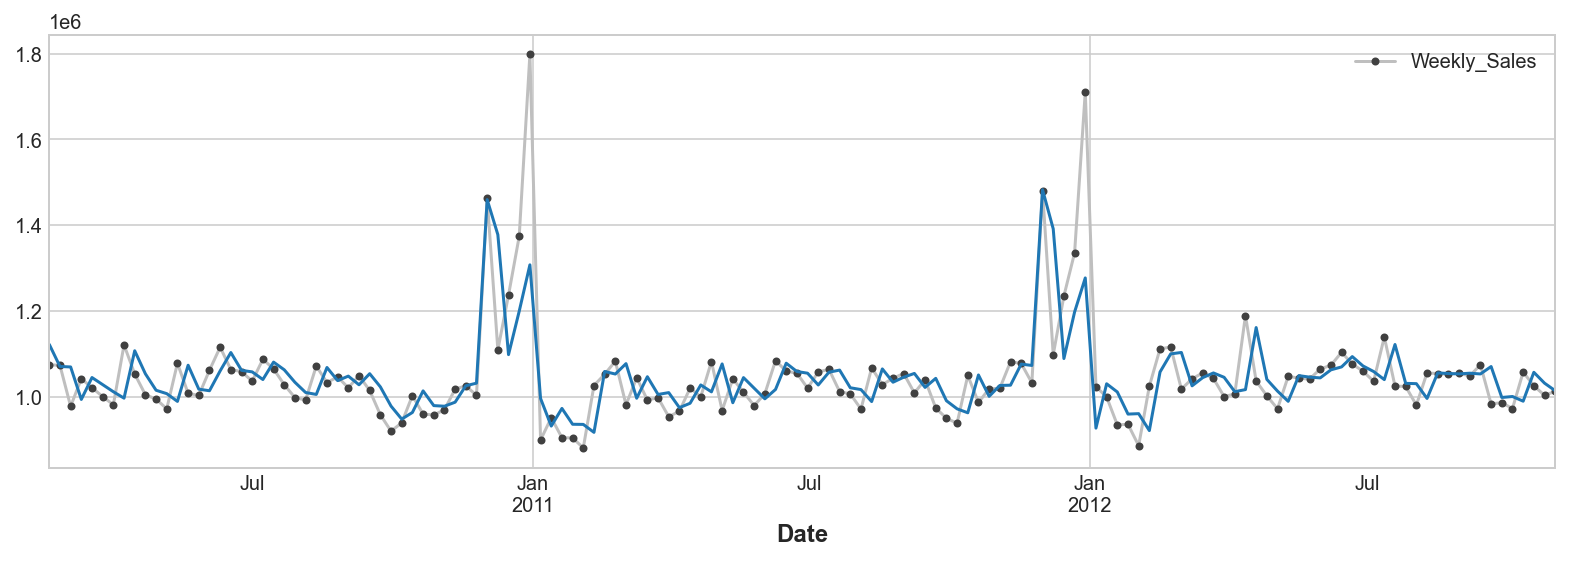

In [63]:
#Let plot the model and the sales to visualize how the model improved
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [64]:
#Let add features like CPI, temperature and fuel price to see if there is going to be an improvement of our scores 
df7 = df4.copy()
df7['Lag_1'] = df7['Weekly_Sales'].shift(1)

df7 = df7.reindex(columns=['Weekly_Sales', 'Lag_1', 'Holiday_Flag', 'CPI','Temperature', 'Fuel_Price'] ).dropna()
df7.head()

,Weekly_Sales,Lag_1,Holiday_Flag,CPI,Temperature,Fuel_Price
Date,,,,,,
2010-02-12,1.074148e+06,1.105572e+06,1,167.825608,34.151333,2.694022
2010-02-19,1.072822e+06,1.074148e+06,0,167.871686,37.719778,2.672067
2010-02-26,9.770794e+05,1.072822e+06,0,167.909657,39.243556,2.683933
2010-03-05,1.041588e+06,9.770794e+05,0,167.947628,42.917333,2.731200
2010-03-12,1.020564e+06,1.041588e+06,0,167.985598,47.432444,2.774422


In [65]:
X = df6.drop('Weekly_Sales', axis = 1)
y = df6.loc[:, 'Weekly_Sales']  # create the target

model = linear_model.LinearRegression()
model.fit(X, y)

df5.dropna(inplace=True)

y_pred = pd.Series(model.predict(X), index=X.index)

In [66]:
print("MAE = ", mean_absolute_error(y, y_pred))
print("MAPE = ", mean_absolute_percentage_error(y, y_pred))
print("R2  = ", r2_score(y, y_pred))

MAE =  52311.91828671842
MAPE =  0.047496469805816205
R2  =  0.5051003198306739


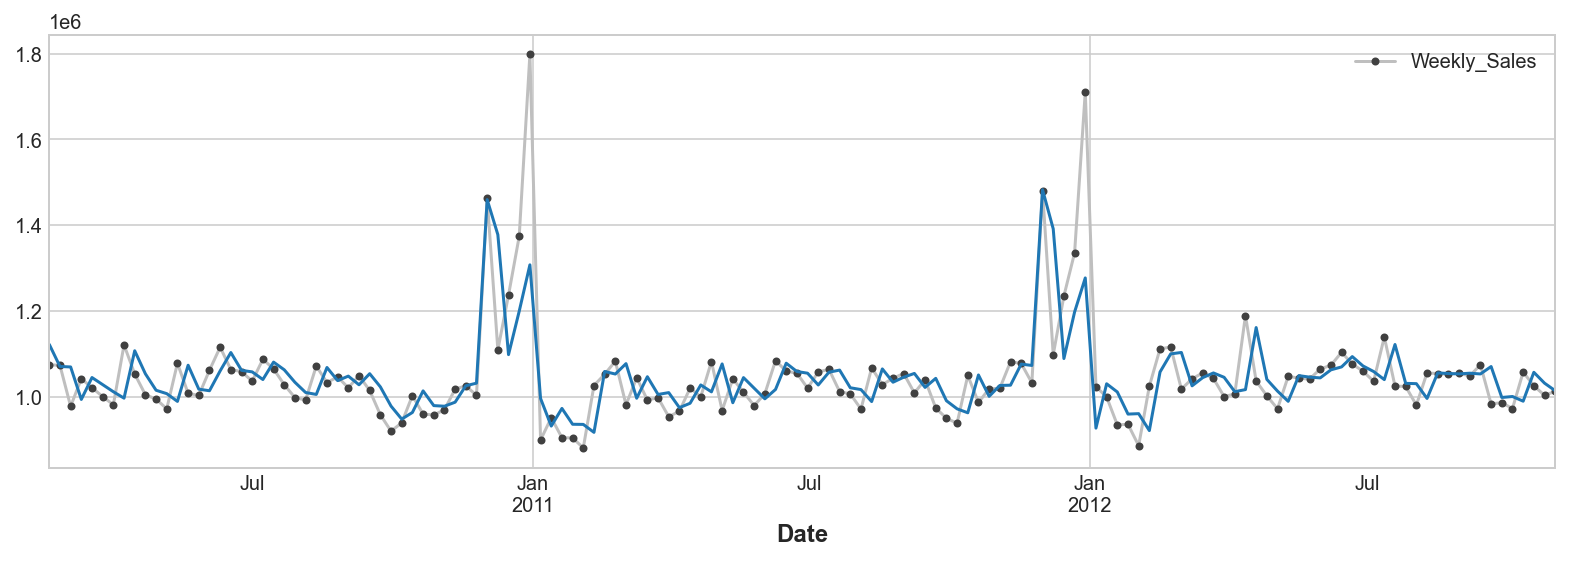

In [67]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

<p style="font-size:100%;"><strong> Abviously CPI, temperature and fuel price didn't improve our model.
</strong></p>

<p style="font-size:120%;"><strong>4.	How well does the model perform in steps (2) & (3)? Did adding exogenous variables improve the model’s performance? Please use proper performance metrics.
</strong></p>

<p style="font-size:100%;"><strong> The model did better in step 3 than in step 2. Adding exogenous variables improved the model 's performance. In step 2 we have MAE =  64560.207057839405, MAPE =  0.057080296924205874, R2  =  0.001058152661284284 and in step 3 we have MAE =  52311.91828671842, MAPE =  0.047496469805816205, R2  =  0.5051003198306739. The lag feature and the holidays features impacted a lot the model.
</strong></p>

  <p style="font-size:160%;color:blue;"><strong>Thank You
                                                     </strong></p>
                                                     
  <p style="font-size:160%;color:blue;"><strong>Kokou F. Kpedzroku
                                                     </strong></p>           